In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

from formulaic import Formula, model_matrix
from gapminder import gapminder

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Trabajo Práctico Nº2 - Laboratorio de Datos

**Integrantes:**
- Martínez, Fausto.
- Oviedo, Santiago.

## Preprocesamiento

### Ejercicio 1

Cargar en un DataFrame los datos del archivo $\texttt{FBRef2020-21.csv}$.

In [2]:
FBref = pd.read_csv("FBRef2020-21.csv")
FBref.shape

(2823, 128)

### Ejercicio 2

Eliminar a los jugadores que jugaron menos de 500 minutos en la temporada (columna $\texttt{Min}$).

In [3]:
FBref = FBref[FBref['Min']>500]
FBref.shape

(1959, 128)

### Ejercicio 3

Eliminar los datos faltantes. Por ejemplo, eliminar columnas con más de 100 datos faltantes y luego las filas con datos faltantes, o convertir los datos faltantes a algún valor apropiado.

In [4]:
FBref

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
2819,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
2820,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
2821,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


In [5]:
# Vemos cuantos jugadores tienen datos fantantes en cada columna
with pd.option_context("display.max_rows",None):
    print(FBref.isna().sum())

Player                   0
Nation                   0
Pos                      0
Squad                    0
Comp                     0
Age                      0
Born                     0
MP                       0
Starts                   0
Min                      0
90s                      0
Ast/90                   0
npG/90                   0
npG+A/90                 0
xA/90                    2
npxG/90                  2
npxG+xA/90               2
Shots/90                 0
SoTs/90                  0
SoT%                   140
Gls/Shot               140
Gls/SoT                297
AvgShotDist            142
FKSht/90                 2
npxG/Shot              142
np:G-xG                  2
PassCmp/90               2
PassAtt/90               2
PassCmp%                 2
TotDistPass/90           2
PrgDistPass/90           2
ShortCmp/90              2
ShortAtt/90              2
ShortCmp%                2
MedCmp/90                2
MedAtt/90                2
MedCmp%                  2
L

In [6]:
nan_cols = FBref.isna().sum() > 50
keep = nan_cols.index[~(nan_cols)]
FBref = FBref[keep]
FBref

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
2819,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
2820,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
2821,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


Eliminamos 7 columnas.

In [7]:
FBref = FBref.dropna()
FBref

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
2819,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
2820,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
2821,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


Eliminamos 18 jugadores

In [8]:
FBref.isna().sum()

Player                 0
Nation                 0
Pos                    0
Squad                  0
Comp                   0
                      ..
Dispossessed/90        0
PassTarget/90          0
PassesReceived/90      0
PassRec%               0
ProgPassReceived/90    0
Length: 121, dtype: int64

### Ejercicio 4

Al finalizar la limpieza de datos, resetear los índices.

In [9]:
FBref = FBref.reset_index().drop('index',axis=1)
FBref

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
1937,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
1938,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
1939,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


### Ejercicio 5

Definir el DataFrame $\texttt{data\_num}$ que solo contenga las variables numéricas, a partir de la columna $\texttt{Ast/90}$, inclusive. Para clustering y clasificación no vamos a utilizar las variables categóricas ni edad ni minutos jugados.

In [10]:
FBref.columns[0:20]

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Ast/90', 'npG/90', 'npG+A/90', 'xA/90',
       'npxG/90', 'npxG+xA/90', 'Shots/90', 'SoTs/90', 'FKSht/90'],
      dtype='object')

Observamos que la columna $\texttt{Ast/90}$ es la N°12, así que decidimos borrar todas las columnas hasta esa.

In [11]:
data_num = FBref.drop(FBref.columns[0:11],axis=1)
data_num

,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,FKSht/90,np:G-xG,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,0.15,-0.06,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,0.00,0.04,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,0.00,-0.09,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,0.00,0.02,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,0.00,-0.03,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0.00,0.14,0.14,0.00,0.09,0.09,1.11,0.14,0.00,0.06,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
1937,0.19,0.19,0.39,0.11,0.22,0.33,2.13,0.84,0.00,-0.03,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
1938,0.17,0.14,0.31,0.18,0.11,0.28,1.03,0.41,0.03,0.03,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
1939,0.21,0.21,0.42,0.14,0.12,0.26,1.47,0.63,0.07,0.09,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


In [12]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Columns: 110 entries, Ast/90 to ProgPassReceived/90
dtypes: float64(105), object(5)
memory usage: 1.6+ MB


Observamos que tenemos 5 columnas que son de tipo $\texttt{object}$, veamos que tienen.

In [13]:
columnas_object = data_num.select_dtypes(include='object')
columnas_object

,%TchsDefPen,%TchsDefThrd,%TchsMidThrd,%TchsAttThrd,%TchsAttPen
0,0.05431547619,0.306547619,0.4851190476,0.2604166667,0.0287202381
1,0.1336923077,0.5769230769,0.4723076923,0.01969230769,0.01
2,0.1653027823,0.6055646481,0.4320785597,0.02929623568,0.01865793781
3,0.06929674099,0.4065180103,0.5317324185,0.1260720412,0.01012006861
4,0.1458607096,0.5164257556,0.4914586071,0.08186596583,0.008015768725
...,...,...,...,...,...
1936,0.0137254902,0.1408496732,0.5261437908,0.4117647059,0.05
1937,0.007679180887,0.1155290102,0.4982935154,0.4658703072,0.06604095563
1938,0.02243186583,0.1192872117,0.4444444444,0.5303983229,0.08092243187
1939,0.01461716937,0.2044083527,0.3851508121,0.5104408353,0.08607888631


Observamos que son en realidad variables numéricas, así que si el Clustering no se queja, las dejamos.

## Clustering

### Ejercicio 6

Nuestro primer objetivo es realizar algún agrupamiento de jugadores con características similares.

#### Inciso a

Seleccionar dos variables cualesquiera de los datos y realizar un gráfico de dispersión de una variable en función de la otra para el total de las observaciones. ¿Pueden encontrar fácilmente grupos distintos?

In [14]:
data_num

,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,FKSht/90,np:G-xG,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,0.15,-0.06,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,0.00,0.04,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,0.00,-0.09,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,0.00,0.02,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,0.00,-0.03,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0.00,0.14,0.14,0.00,0.09,0.09,1.11,0.14,0.00,0.06,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
1937,0.19,0.19,0.39,0.11,0.22,0.33,2.13,0.84,0.00,-0.03,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
1938,0.17,0.14,0.31,0.18,0.11,0.28,1.03,0.41,0.03,0.03,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
1939,0.21,0.21,0.42,0.14,0.12,0.26,1.47,0.63,0.07,0.09,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


Seleccionamos las variables 

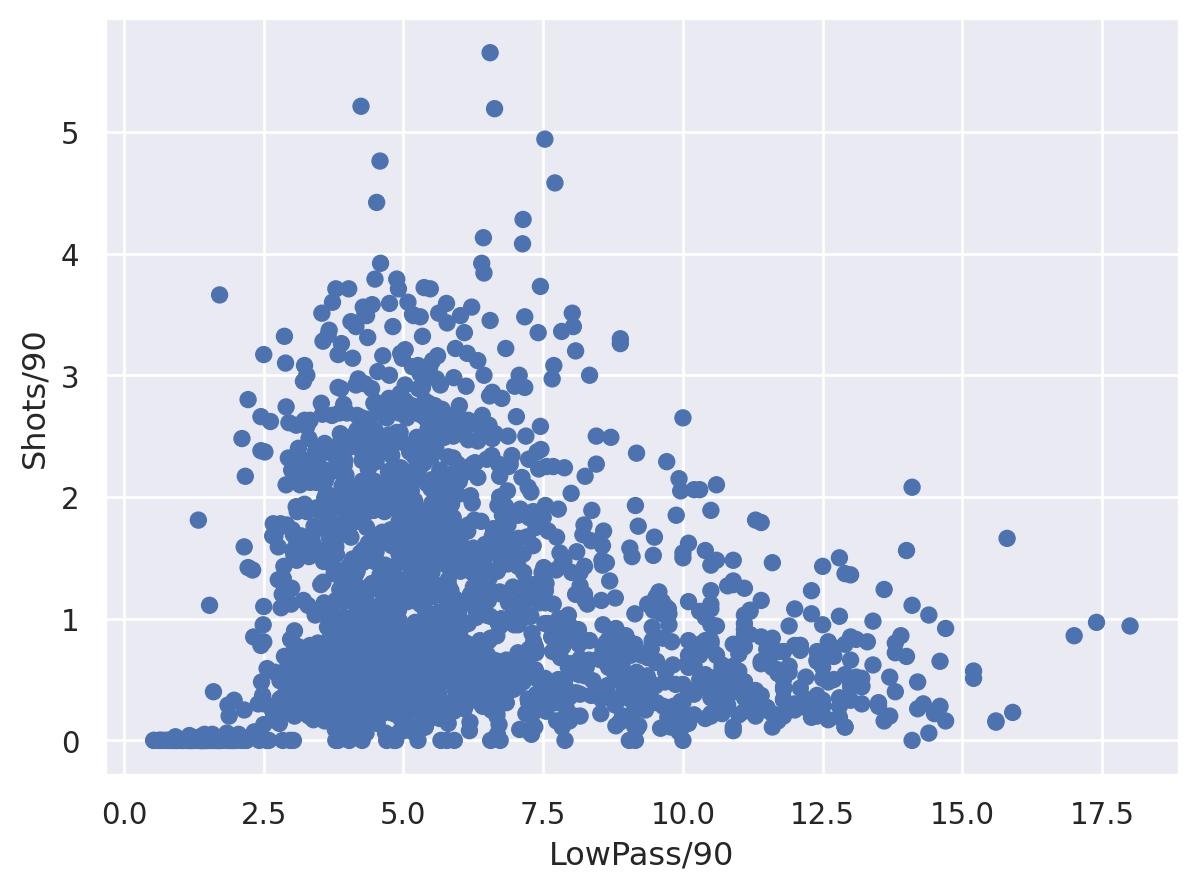

In [15]:
(
    so.Plot(data=data_num,x="LowPass/90",y="Shots/90")
    .add(so.Dot())
)

No se observa ningún tipo de cluster.

#### Inciso b

Escalar los datos y realizar un análisis de componentes principales, quedándose solo con las dos primeras componentes. Realizar un gráfico como el del punto anterior. ¿Cuántos clusters puede distinguir en el gráfico? ¿A qué características de los jugadores pueden corresponder los clusters? ¿Cómo pueden verificar su conjetura? (realizar una visualización o algún cálculo)

---------------------------
Primero, escalamos los datos

In [16]:
data_num[data_num.columns] = MinMaxScaler().fit_transform(data_num)
data_num

,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,FKSht/90,np:G-xG,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,0.065789,0.000,0.029586,0.074074,0.066667,0.086207,0.161062,0.118577,0.126050,0.373737,...,0.311029,0.375974,0.266200,0.138138,0.122677,0.162,0.365111,0.356109,0.886792,0.151948
1,0.000000,0.072,0.053254,0.018519,0.055556,0.051724,0.083186,0.063241,0.000000,0.474747,...,0.426314,0.117532,0.043783,0.009009,0.046468,0.094,0.380132,0.390166,0.952830,0.014286
2,0.000000,0.000,0.000000,0.000000,0.088889,0.077586,0.164602,0.083004,0.000000,0.343434,...,0.383210,0.074026,0.012259,0.000000,0.026022,0.014,0.278991,0.287995,0.963836,0.000000
3,0.000000,0.056,0.041420,0.055556,0.055556,0.068966,0.116814,0.059289,0.000000,0.454545,...,0.297003,0.210390,0.115587,0.000000,0.040892,0.000,0.290006,0.293316,0.937107,0.038312
4,0.039474,0.000,0.017751,0.055556,0.033333,0.051724,0.046018,0.000000,0.000000,0.404040,...,0.548782,0.240909,0.178634,0.009009,0.083643,0.052,0.451232,0.464666,0.957547,0.045455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0.000000,0.112,0.082840,0.000000,0.100000,0.077586,0.196460,0.055336,0.000000,0.494949,...,0.240900,0.225325,0.243433,0.126126,0.180297,0.194,0.252954,0.161345,0.487421,0.180519
1937,0.250000,0.152,0.230769,0.203704,0.244444,0.284483,0.376991,0.332016,0.000000,0.404040,...,0.453339,0.565584,0.350263,0.309309,0.407063,0.516,0.523333,0.409323,0.625786,0.536364
1938,0.223684,0.112,0.183432,0.333333,0.122222,0.241379,0.182301,0.162055,0.025210,0.464646,...,0.464970,0.483766,0.441331,0.330330,0.429368,0.572,0.434208,0.315666,0.561321,0.533117
1939,0.276316,0.168,0.248521,0.259259,0.133333,0.224138,0.260177,0.249012,0.058824,0.525253,...,0.328818,0.340260,0.245184,0.336336,0.546468,0.490,0.345083,0.235845,0.517296,0.399351


In [17]:
pca = PCA(n_components = 2)

componentesPrincipales = pca.fit_transform(data_num)
print(componentesPrincipales)

[[-0.34036939  0.45523206]
 [-1.17819738  0.04835493]
 [-1.1383283  -0.34705101]
 ...
 [ 1.18861409  0.02762972]
 [ 1.06498396 -0.34628526]
 [ 0.5034153   0.31933506]]


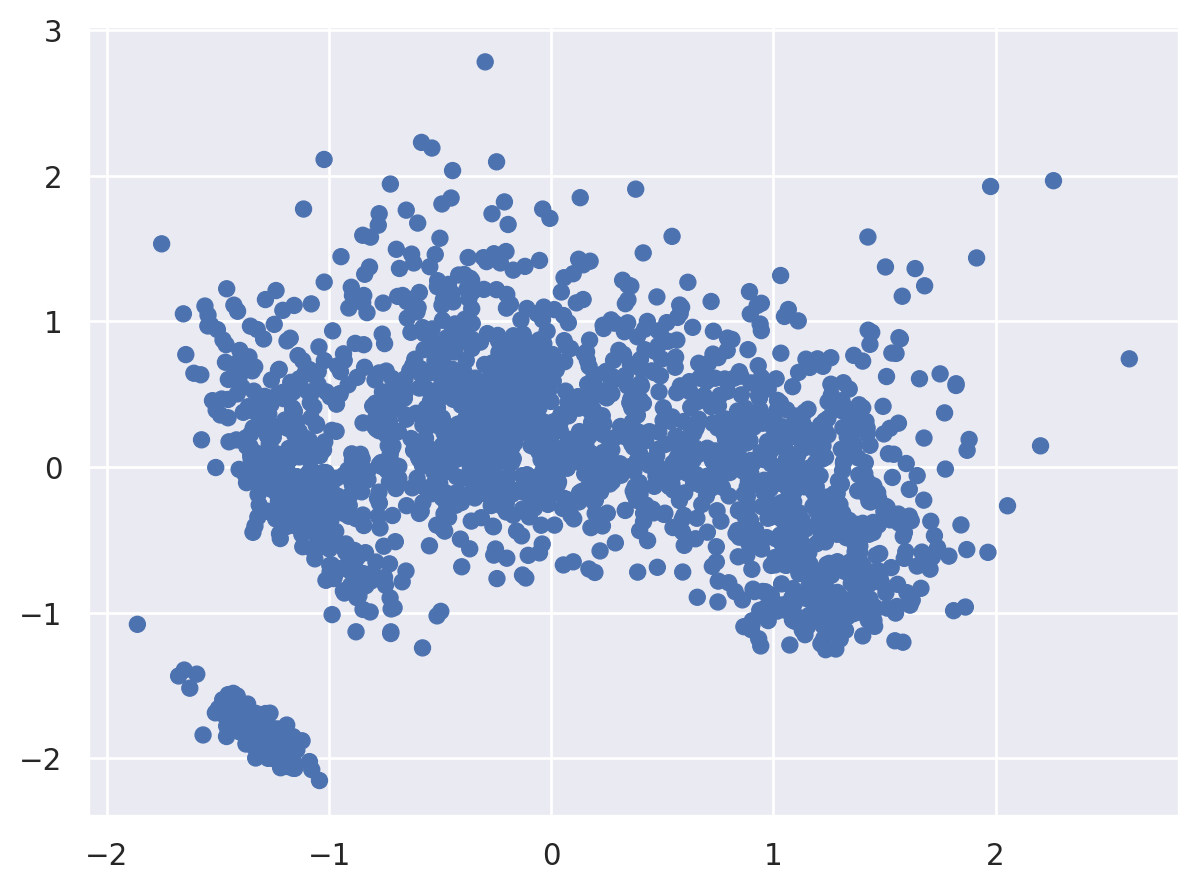

In [18]:
(
    so.Plot(x=componentesPrincipales[:,0],y=componentesPrincipales[:,1])
    .add(so.Dot())
    .add(so.Text())
)

Sospechamos que puede ser que sean arqueros y jugadores de campo, para chequearlo, coloreamos los puntos según la posición en el campo

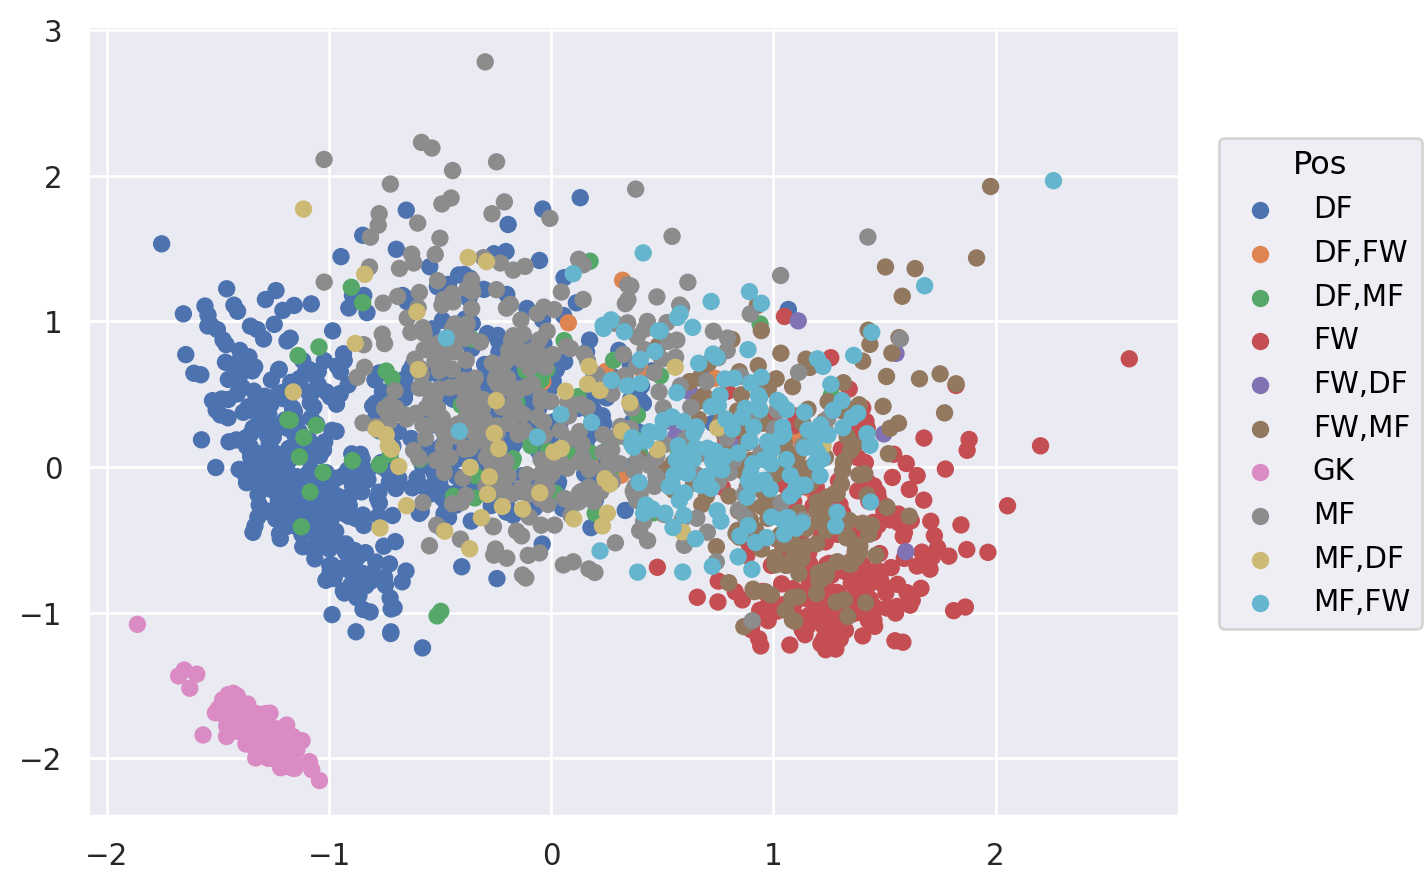

In [19]:
(
    so.Plot(x=componentesPrincipales[:,0],y=componentesPrincipales[:,1],color=FBref.Pos)
    .add(so.Dot())
)

#### Inciso c

Para la cantidad de clusters observados en el ítem anterior, realizar un agrupamiento por $k$-medias, y colorear los puntos según las etiquetas obtenidas. ¿Coinciden las etiquetas con lo esperado?

In [20]:
kmeans = KMeans(n_clusters=2)
etiquetas1 = kmeans.fit_predict(data_num)
etiquetas2 = kmeans.fit_predict(componentesPrincipales)

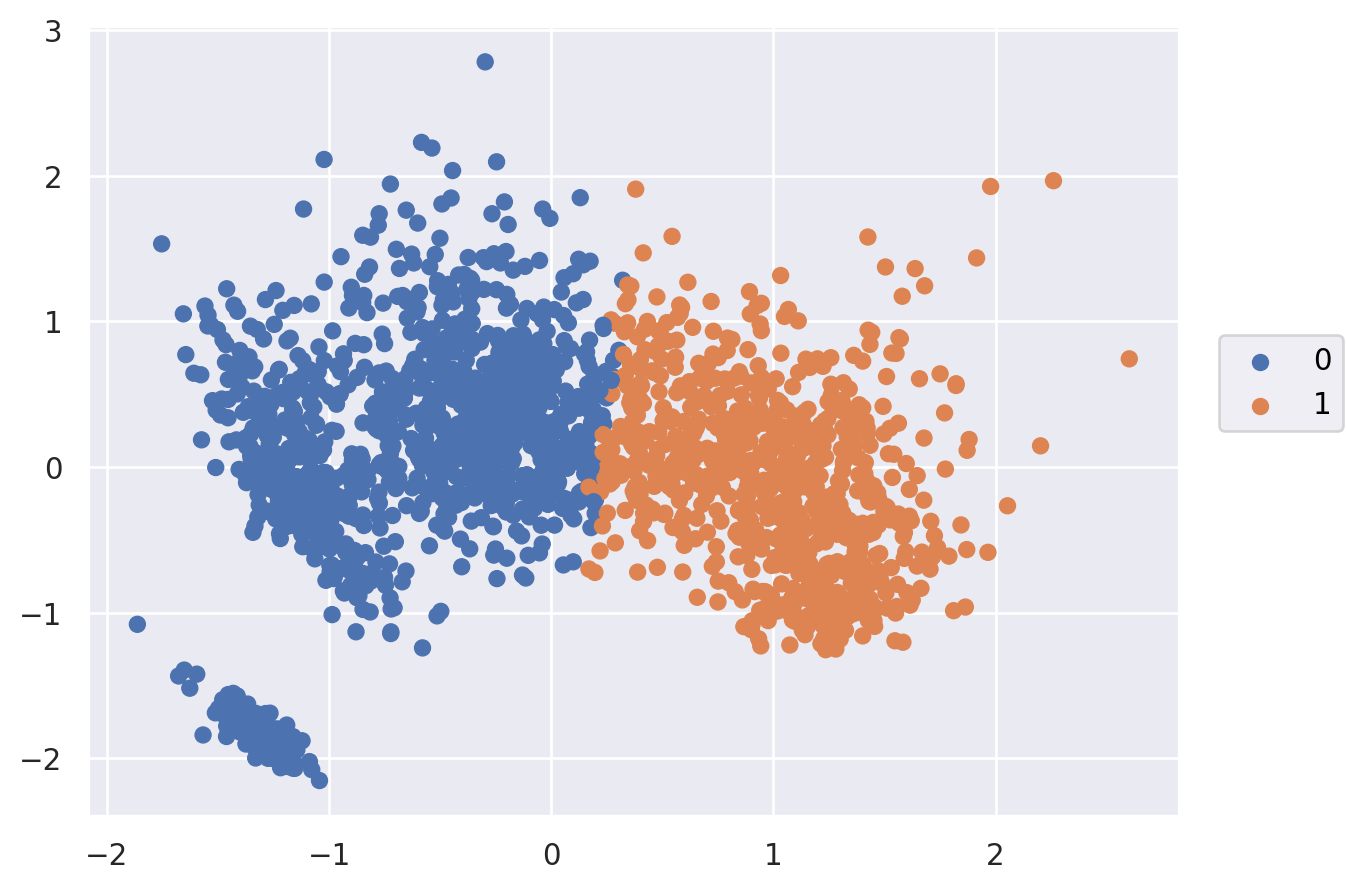

In [21]:
(
    so.Plot(x=componentesPrincipales[:,0],y=componentesPrincipales[:,1], color=etiquetas1.astype("str"))
    .add(so.Dot())
)

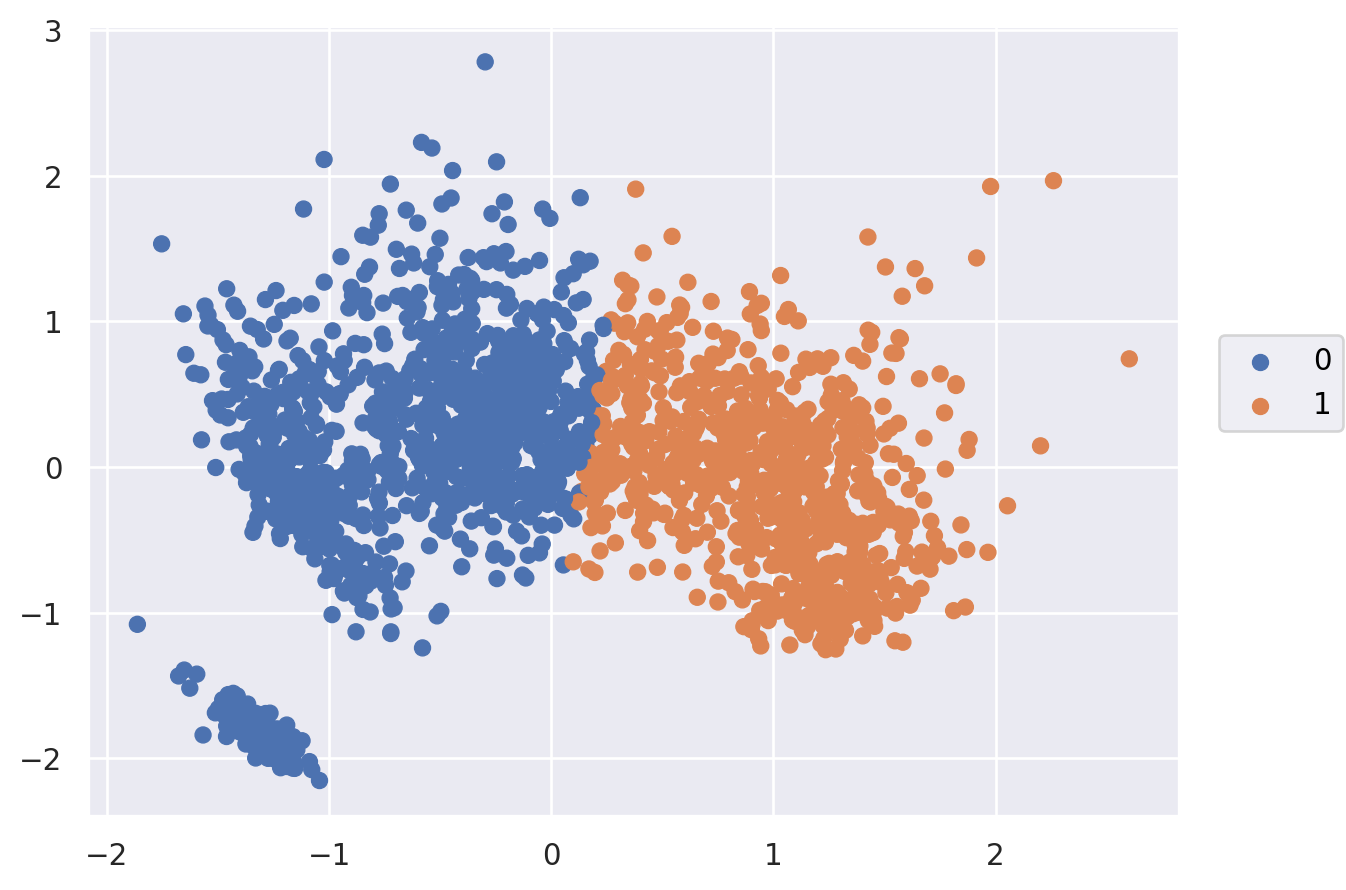

In [22]:
(
    so.Plot(x=componentesPrincipales[:,0],y=componentesPrincipales[:,1], color=etiquetas2.astype("str"))
    .add(so.Dot())
)

Vemos que utilizando el método K-means, no obtenemos los clusters esperados. Sci-kit 

#### Inciso d

Repetir el agrupamiento utilizando DBSCAN. ¿Cómo elegirían en este caso un valor de $\epsilon$ apropiado? Sugerencia: consultar la sección "Selección del hiperparámetro $eps$" del Notebook de la clase de DBSCAN (o utilizar cualquier otra técnica que consideren apropiada)

In [24]:
neighbors = NearestNeighbors(n_neighbors = 2)
neighbors_fit = neighbors.fit(componentesPrincipales)

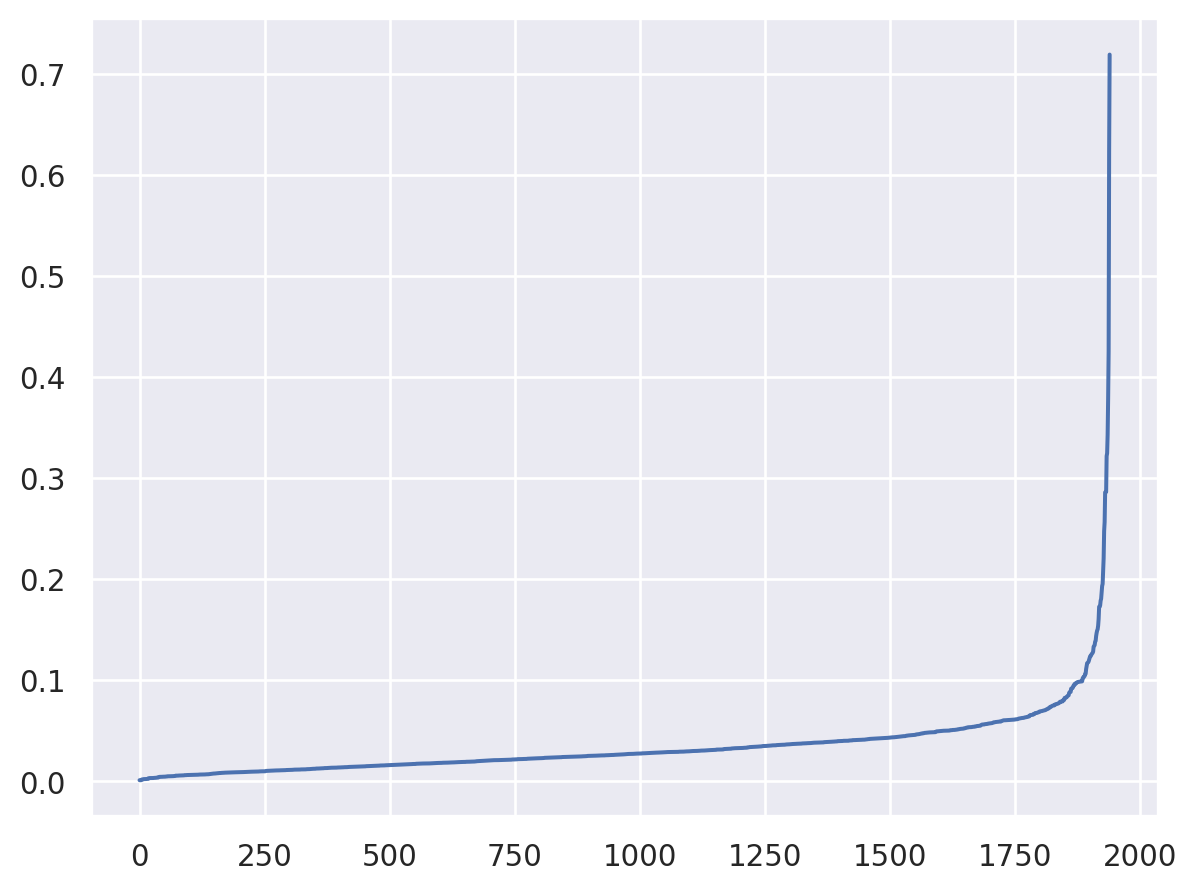

In [25]:
distances, indices = neighbors_fit.kneighbors(componentesPrincipales)
distances = distances[:,1]
distances = np.sort(distances, axis = 0)

so.Plot(x = np.arange(len(distances)), y = distances).add(so.Line())

In [26]:
dbscan = DBSCAN(eps = 0.20, min_samples=8)
etiquetas1 = dbscan.fit_predict(componentesPrincipales)

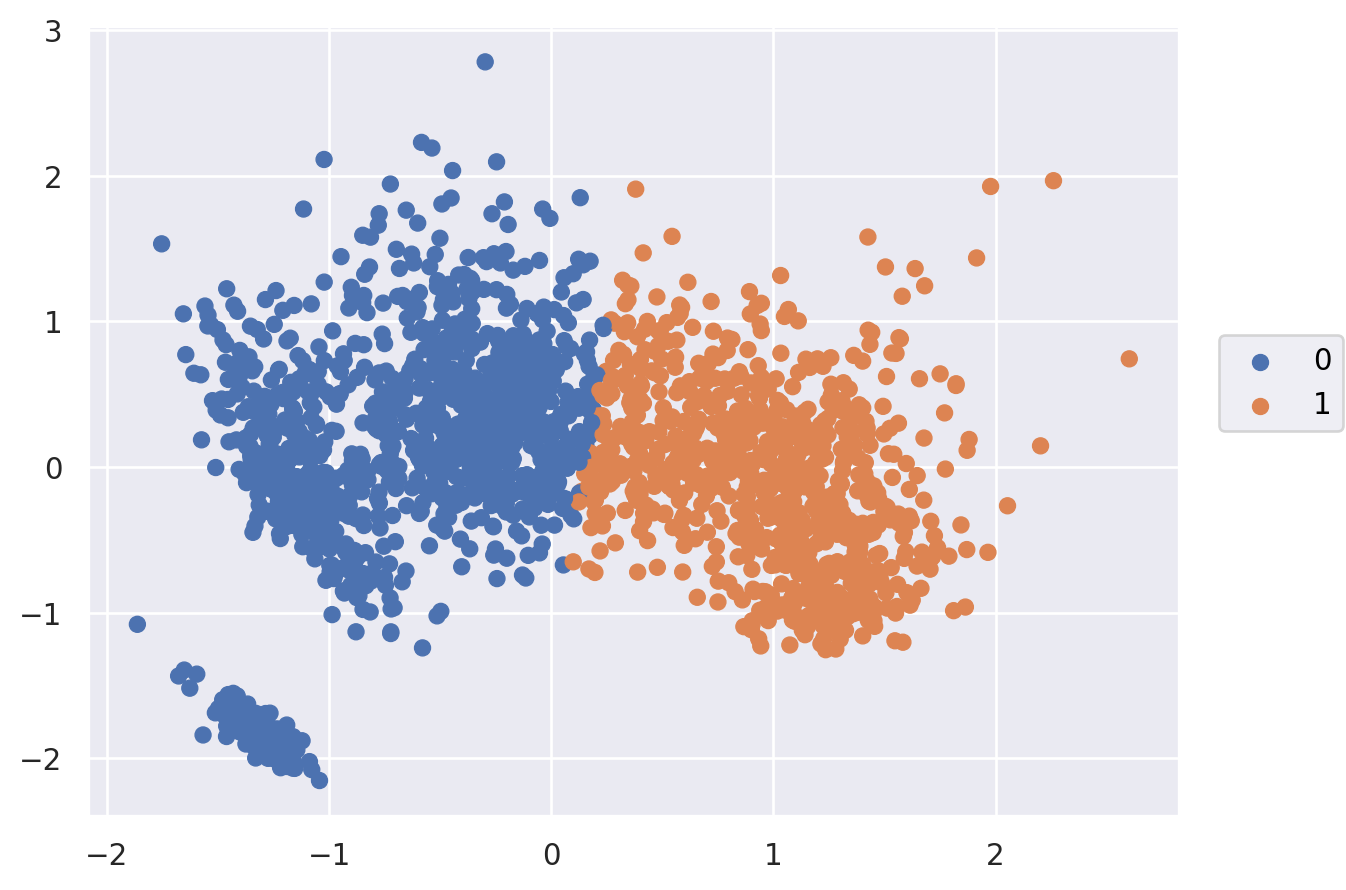

In [27]:
(
    so.Plot(x=componentesPrincipales[:,0],y=componentesPrincipales[:,1], color=etiquetas2.astype("str"))
    .add(so.Dot())
)

#### Inciso e

Utilizar DBSCAN para realizar agrupamiento utilizando como datos todas las variables originales en lugar de solo las dos componentes principales, modificando los valores de $\texttt{epsilon}$ y $\texttt{minPts}$ convenientemente. ¿Con cuál de las dos opciones obtienen mejores resultados?

In [33]:
dbscan = DBSCAN(eps = 1.5, min_samples=8)
etiquetas2 = dbscan.fit_predict(data_num)

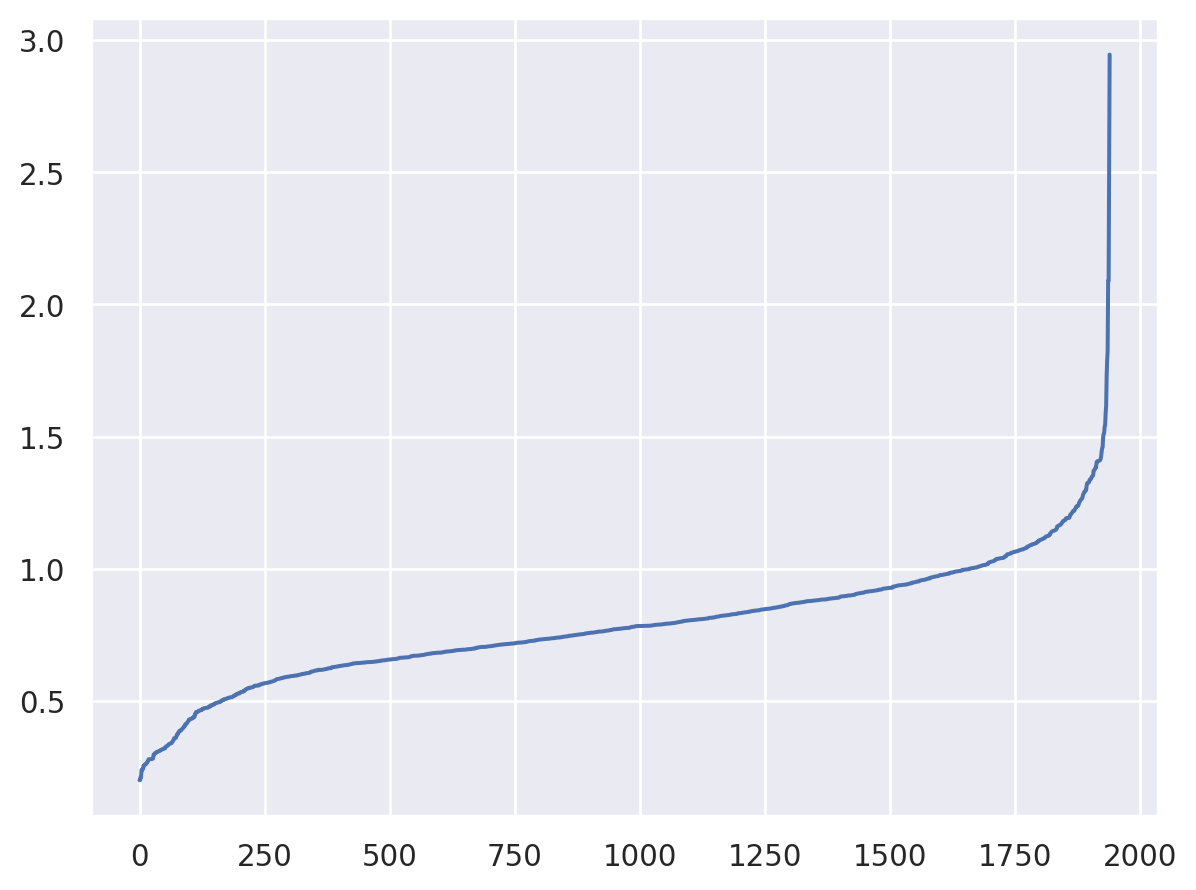

In [34]:
distances, indices = neighbors_fit.kneighbors(data_num)
distances = distances[:,1]
distances = np.sort(distances, axis = 0)

so.Plot(x = np.arange(len(distances)), y = distances).add(so.Line())

In [30]:
neighbors = NearestNeighbors(n_neighbors = 2)
neighbors_fit = neighbors.fit(data_num)

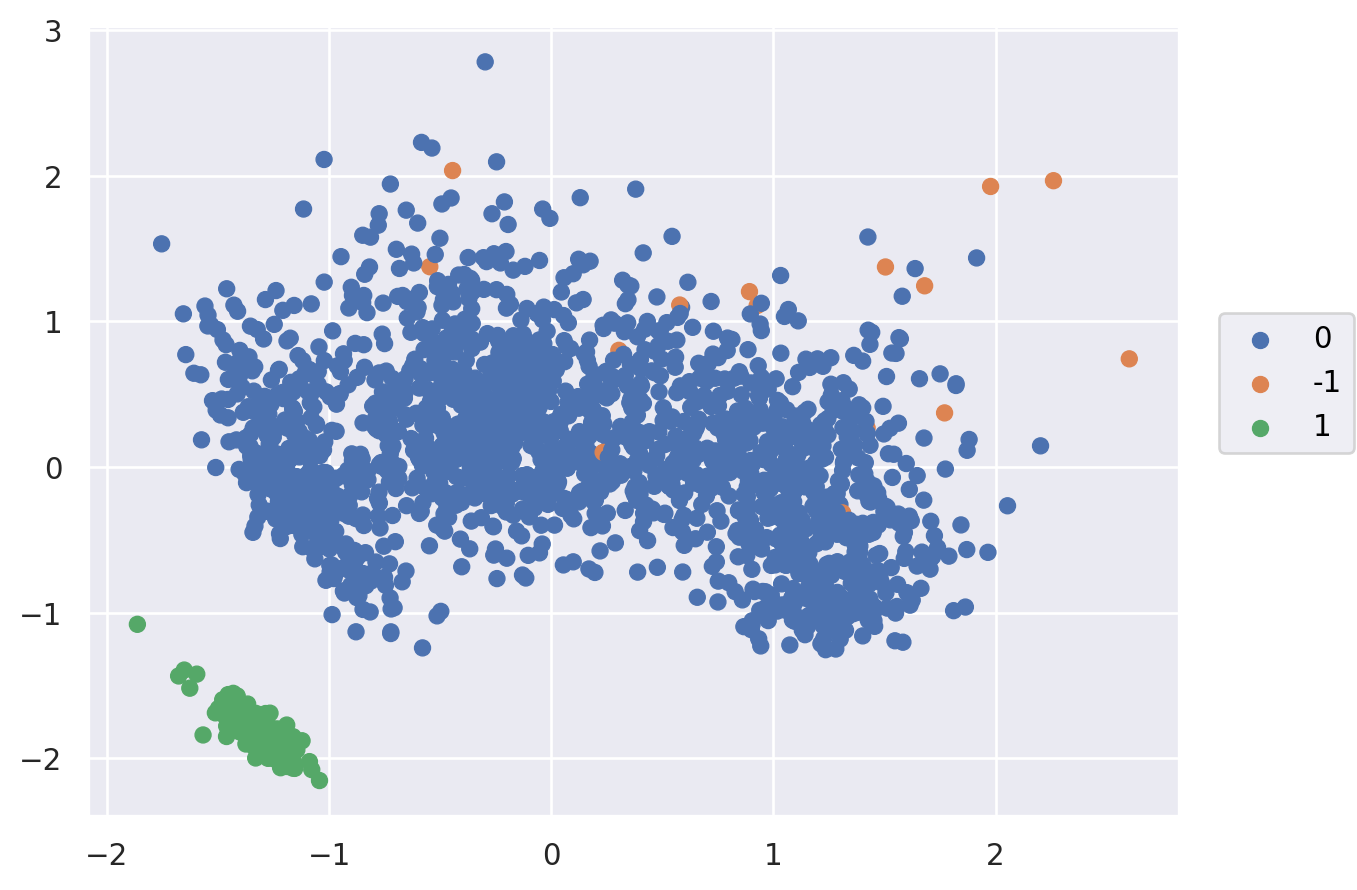

In [31]:
(
    so.Plot(x=componentesPrincipales[:,0],y=componentesPrincipales[:,1], color=etiquetas2.astype("str"))
    .add(so.Dot())
)

## Clasificación

### Ejercicio 7

Ahora queremos poder predecir la posición en la que juega cada jugador según sus datos estadístico utilizando $KNN$. En la columna $\texttt{Pos}$ encontramos la posición de los jugadores. Para la mayoría de los jugadores se indica una única posición pero algunos jugadores tienen dos posiciones. Para simplificar el análisis vamos a considerar una única posición por jugador.

#### Inciso a

Definir la variable $\texttt{Pos\_filt}$ que es la columna $\texttt{Pos}$, pero donde los jugadores deben tener una sola posición (pueden quedarse sólo con la primera posición de cada jugador o eliminar los jugadores con dos posiciones, lo que consideren más conveniente).

#### Inciso b

Construir el DataFrame $\texttt{data\_clasif}$ que resulta de agregarle la columna $\texttt{Pos\_filt}$ al DataFrame $\texttt{data\_num}$. Dividir $\texttt{data\_num}$ en un 80% para entrenamiento y un 20% para testeo.

#### Inciso c

Aplicar un esquema de validación en el conjunto de entrenamiento para seleccionar el valor óptimo de $K$. (Esto puede demorar mucho si prueban muchos valores de $K$, pueden hacerlo hasta un valor máximo de $K$=20.)

**Sugerencia:** puede resultar de ayuda $\texttt{KNeighborsClassifier}$ de $\texttt{sklearn}$ e investigar esa librería para aplicar esquemas de validación.

#### Inciso d

Para el valor de $K$ obtenido, ¿cuál es el porcentaje de aciertos en el conjunto de testeo?

#### Inciso e

Repetir el procedimiento utilizando las primeras dos componentes principales en vez de todas las variables. Indicar si se obtienen mejores resultados.

### Ejercicio 8

Repetir el mismo método de clasificación con el dataset de jugadoras de la liga inglesa femenina $\texttt{superleague2023.csv}$. Para esto, quedarse con la columna $\texttt{Pos}$ y las columnas a partir de $\texttt{MP}$, inclusive. ¿Qué porcentaje de aciertos obtienen en este caso? ¿Pueden modificarse el parámetro para obtener un porcentaje mayor?

## Recomendaciones de jugadores

### Ejercicio 9 

Trabajamos ahora con el dataset $\texttt{transfermarkt\_fbref\_201920.csv}$ que incluye la valuación de los jugadores. Una de las aplicaciones más comunes de análisis de datos en el fútbol es para obtener recomendaciones de jugadores a comprar.

Si al leer el $\texttt{.csv}$ salta un error, intentar con:

`data=pd.read_csv('transfermarkt_fbref_201920.csv',delimiter=';')`

#### Inciso a

En 2021, Messi fue transferido del Barcelona al PSG. Basándonse en los datos disponibles, recomendarle a Barcelona un jugador de características similares a Messi pero de menor valor.

#### Inciso b

Queremos elaborar un modelo para detectar jugadores "baratos", es decir, cuya valuación en el mercado (columna $\texttt{value}$) sea inferior a la que nosotros estimemos. Para esto, quisiéramos ajustar el valor de mercado a partir de los datos de los jugadores (para estimar la valuación pueden incorporar la edad entre las variables explicativas). El modelo que desarrollen puede basarse en redes neuronales o en otro modelo que consideren adecuado.

#### Inciso c

Según el modelo desarrollado, entre los jugadores con un valor de mercado mayor a $100000, ¿quién es el más sobrevalorado? Es decir, el jugador con mayor diferencia entre el valor de mercado y el valor predicho por el modelo. ¿Y el más infravalorado?

#### Inciso d

El PSG quiere vender a Mbappé y reemplazarlo por otro jugador más barato. Hacer un listado de los 10 jugadores más parecidos a Mbappé según el crietrio que elijan. De esos 10 jugadores, según el modelo que desarrollaron en el ítem anterior, ¿a qué jugador recomendarían teniendo en cuenta la valuación del mercado y la predicción del modelo? Para ese jugador, averiguar la valuación actual del jugador. ¿Hicieron una buena recomendación?